In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 7th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q13', 'Q14']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Voted in last election', 'Freeness and fairness of last election']

df_new.head()

,State,Voted in last election,Freeness and fairness of last election
0,IMO,I did not vote,"Free and fair, with major problems"
1,FCT ABUJA,I voted in the election,"Free and fair, with major problems"
2,FCT ABUJA,I voted in the election,Completely free and fair
3,FCT ABUJA,I voted in the election,Completely free and fair
4,FCT ABUJA,I did not vote,Not free and fair


In [7]:
df_new['Voted in last election'].value_counts(normalize=True)

I voted in the election             0.804620
I did not vote                      0.182178
I can’t remember whether I voted    0.006601
I was too young to vote             0.006601
Name: Voted in last election, dtype: float64

In [8]:
df_new['Freeness and fairness of last election'].value_counts(normalize=True)

Completely free and fair                  0.419802
Free and fair, but with minor problems    0.297030
Not free and fair                         0.143234
Free and fair, with major problems        0.139934
Name: Freeness and fairness of last election, dtype: float64

In [6]:
hope = ["Don’t know","Refused","Do not understand question"]
less = ['Voted in last election', 'Freeness and fairness of last election']

for j in less:
    for i in hope:
        df_new = df_new.loc[df_new[j] != i]

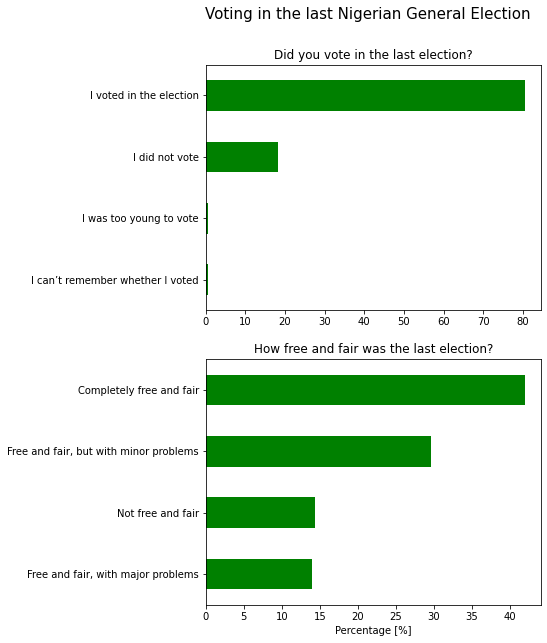

In [23]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.2, top=2)

# Add the main title
fig.suptitle("Voting in the last Nigerian General Election", y=2.2, fontsize=15)


# Add the subplots
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)



# Plot for axis 1-4
(df_new['Voted in last election'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Freeness and fairness of last election'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')

# Add the text for each subplot
ax1.title.set_text("Did you vote in the last election?")
ax2.title.set_text("How free and fair was the last election?")

# label
plt.xlabel('Percentage [%]')

plt.show()